<a href="https://colab.research.google.com/github/jihoadsf/Jiho_coding_challenge/blob/main/Jiho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
#Load data
df = pd.read_csv("LAcrime2020-24.csv")

#View columns
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
#Observe data type
df.info()

#Seeing number of rows and column
print(df.shape)

#Seeing how many NaNs exists
df.isnull().sum()

#Removing missing values with NaNs
df = df.dropna(subset = ['LON', 'LAT', 'Vict Age', 'TIME OCC', 'AREA'])
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986500 entries, 0 to 986499
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986500 non-null  int64  
 1   Date Rptd       986500 non-null  object 
 2   DATE OCC        986500 non-null  object 
 3   TIME OCC        986500 non-null  int64  
 4   AREA            986500 non-null  int64  
 5   AREA NAME       986500 non-null  object 
 6   Rpt Dist No     986500 non-null  int64  
 7   Part 1-2        986500 non-null  int64  
 8   Crm Cd          986500 non-null  int64  
 9   Crm Cd Desc     986500 non-null  object 
 10  Mocodes         840065 non-null  object 
 11  Vict Age        986500 non-null  int64  
 12  Vict Sex        846925 non-null  object 
 13  Vict Descent    846914 non-null  object 
 14  Premis Cd       986486 non-null  float64
 15  Premis Desc     985915 non-null  object 
 16  Weapon Used Cd  326368 non-null  float64
 17  Weapon Des

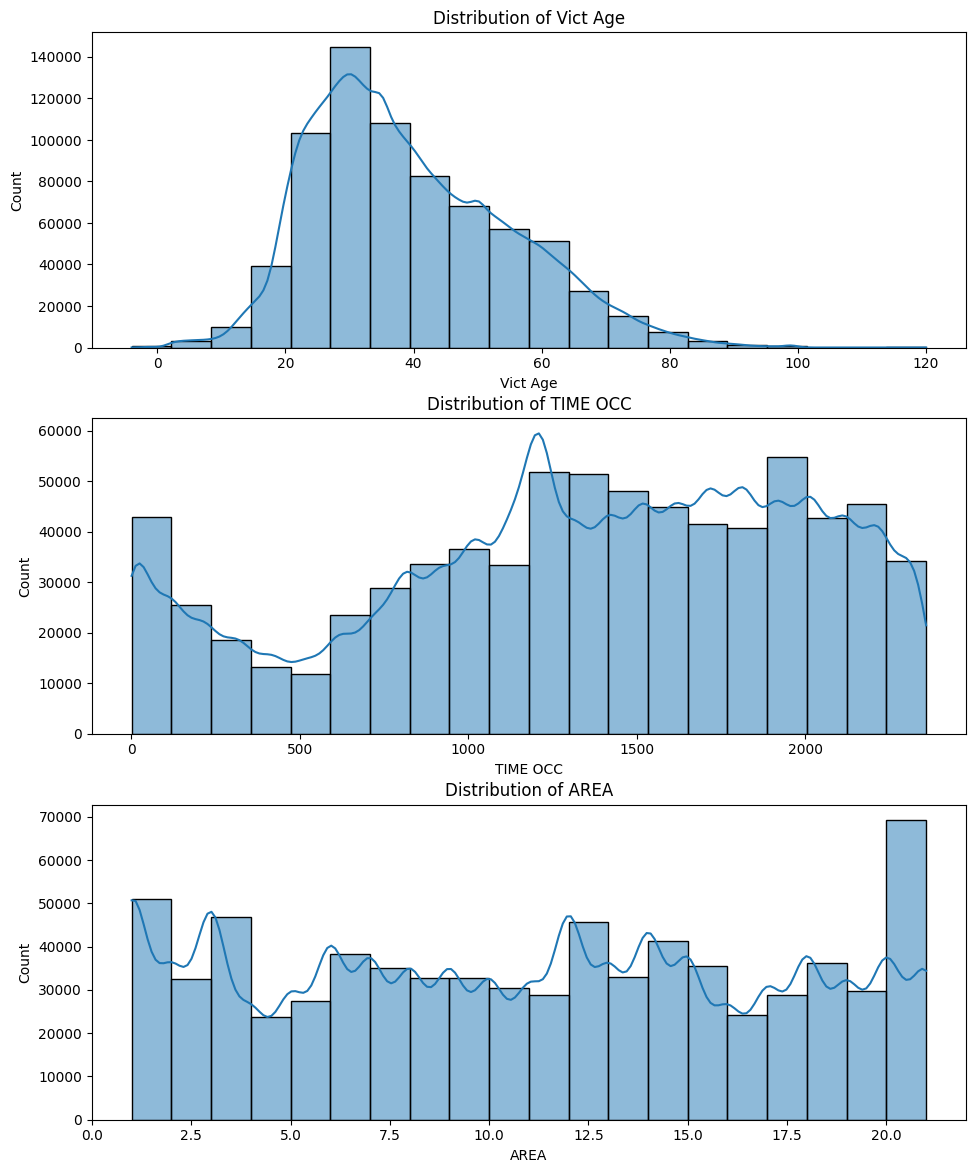

(723374, 28)


In [ ]:
# Select numerical columns for distribution analysis
numerical_cols = ['Vict Age', 'TIME OCC', 'AREA']

# Customize figure and subplots for better visualization
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 12))
fig.tight_layout(pad=3.0) # Add spacing between subplots

# Create histograms with density curves for each numerical column
for i, col in enumerate(numerical_cols):
    ax = axes[i] # Get the current subplot

    sns.histplot(df[col], ax=ax, kde=True, bins=20)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)

plt.show()


# Remove 'Vict Age' values that are 0 (assumed to be missing values)
df = df[df['Vict Age'] != 0]
print(df.shape)

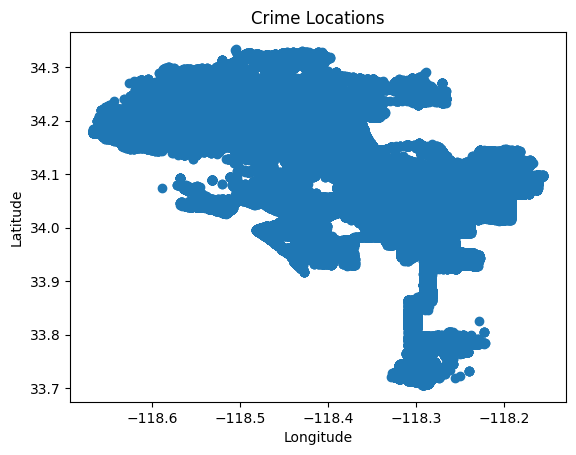

(723374, 44)


In [ ]:
#Scatter plot to see distribution
plt.scatter(df['LON'], df['LAT'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Locations')
plt.show()

#removing outliers at longitude and latitude (0,0)
df = df[(df['LON'] != 0) & (df['LAT'] != 0)]
print(df.shape)

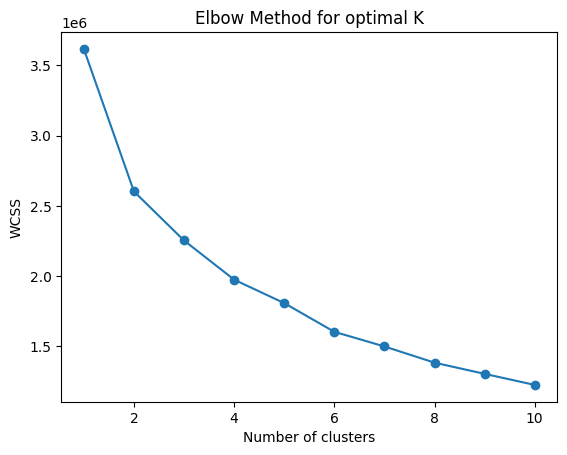

In [ ]:
# Selecting features for clustering
features = ['LON', 'LAT', 'AREA', 'Vict Age', 'TIME OCC']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS (Within-Cluster Sum of Squares) for different cluster numbers
wcss = []
for i in range (1, 11): # Cluster numbers from 1 to 10
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

# Plot the WCSS values for different cluster numbers
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Using optimal K = 4 for K-means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df['kmeans_4'] = kmeans.labels_

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,cluster,kmeans_4
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,0,0
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,0,0
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,1,1
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,0,0
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,3,3


Text(0.5, 1.0, 'K-means Clustering')

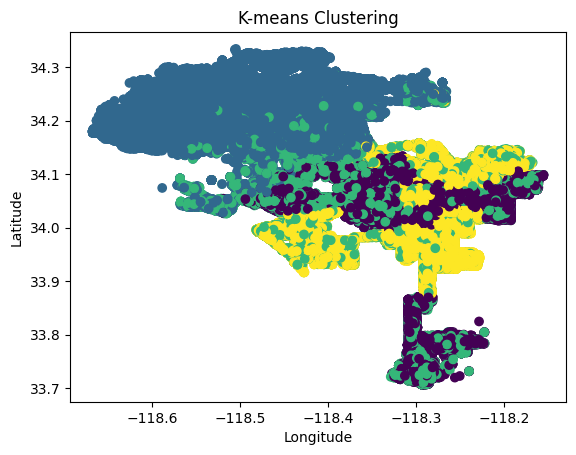

In [ ]:
# Scatter plot for K-means clustering with k = 4

plt.scatter(df['LON'], df['LAT'], c=df['kmeans_4'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')

In [ ]:
# Using for loop to cluster data for k values 4 to 9
for k in range(4, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'kmeans_{k}'] = kmeans.fit_predict(X_scaled)

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,KMeans_6,kmeans_7,KMeans_7,kmeans_8,KMeans_8,kmeans_9,KMeans_9,kmeans_10,kmeans_20,kmeans_30
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,0,0,0,5,5,0,0,0,8,17
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0,0,0,5,5,0,0,0,11,10
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,1,1,1,7,7,7,7,1,18,25
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,0,0,0,5,5,0,0,0,5,28
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,4,4,4,4,4,4,4,4,17,3


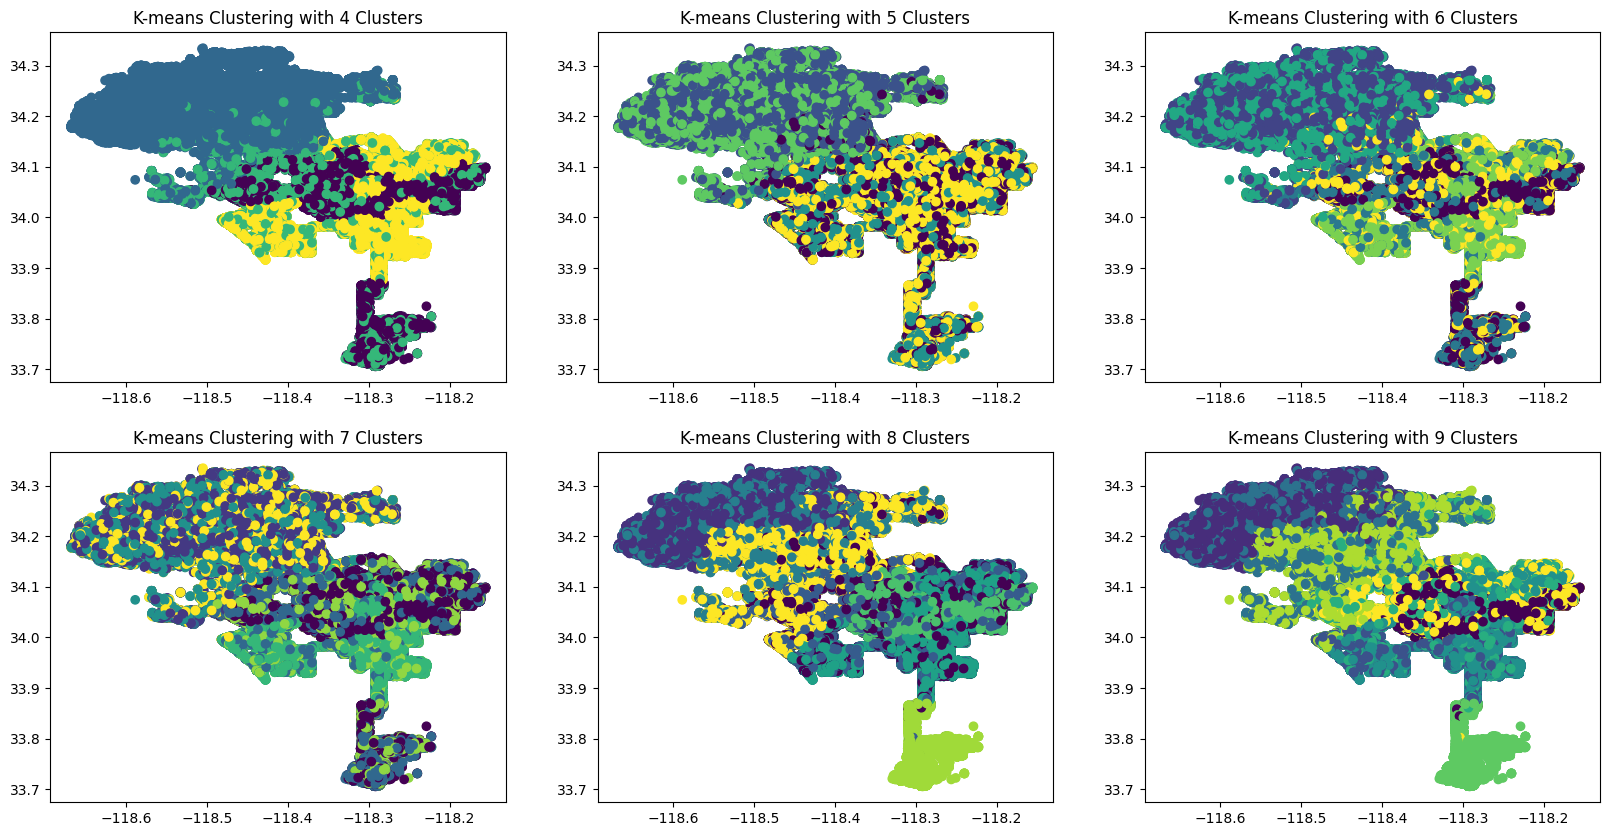

In [ ]:
#Plotting K-means clustering for k = 4 to 9 in a 2 x 3 grid
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 10))


for i, ax in enumerate(fig.axes, start=4):
    ax.scatter(df['LON'], df['LAT'], c=df[f'kmeans_{i}'], cmap='viridis')
    ax.set_title(f'K-means Clustering with {i} Clusters')